In [2]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import signal as sgn





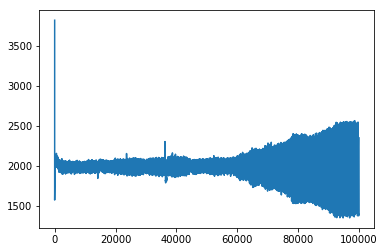

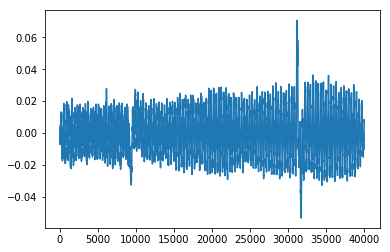

32.0


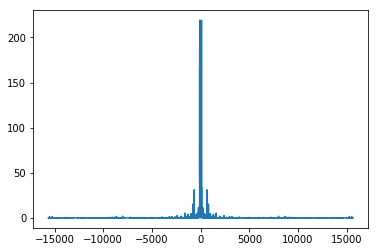

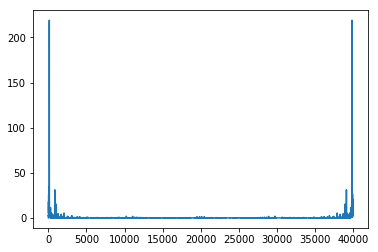

115
89.84375
0.558498238707 2.01059365935


In [29]:
from raspi_import import raspi_import


sample_period, data = raspi_import("./out/adcData_1.bin")

n_start = 5000
n_stop = 45000

def prepros (data, maximum = 4096):
    d = data / maximum
    #d = d - 0.5
    d = d - np.mean(d)
    return d

plt.plot(data[:,3])
plt.show()

q = prepros(data[n_start:n_stop,3])

i =  prepros(data[n_start:n_stop,4])


plt.plot(i)
plt.show()

fft = (np.abs(np.fft.fft(q)))
print(sample_period)
plt.plot(np.fft.fftshift(np.fft.fftfreq(len(fft),sample_period/(1e6))),np.fft.fftshift(fft))
plt.show()
plt.plot(fft)
plt.show()
fft_i = np.abs(np.fft.fft(i)[:len(fft)//2])
fft_q = np.abs(np.fft.fft(q))


#cross = sgn.correlate(fft_i,fft_q)
#plt.plot( cross)
#plt.show()

m = np.amax(fft_i)
i = np.where(fft_i == m)[0][0]
print(i)

fn = ((i / (len(fft)))) * 31250


print(fn )
f_0 = 24.13e9
c = 3e8
v = ( c*(fn) )/ (2*(f_0))

print(v, v*3.6)

In [74]:


def findVelocity(data, start, stop):
    q = prepros(data[start:stop,3])

    i =  prepros(data[start:stop,4])

    fft_i = np.abs(np.fft.fft(i)[:len(i)//2])
    fft_q = np.abs(np.fft.fft(q)[:len(i)//2])
    
    direction = 1 if ( np.mean(np.arctan2(fft_q, fft_i)) > 0 ) else -1
    
    m = np.amax(fft_i)
    i = np.where(fft_i == m)[0][0]
    
    fn = ((i / (len(fft)))) * 31250

    f_0 = 24.13e9
    c = 3e8
    v = ( c*(fn) )/ (2*(f_0))
    return direction*v



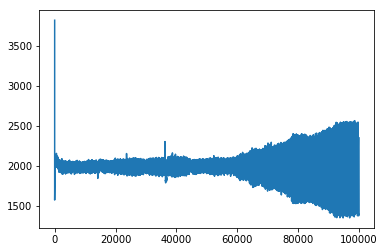

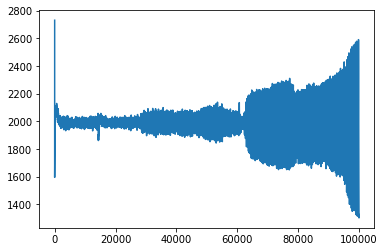

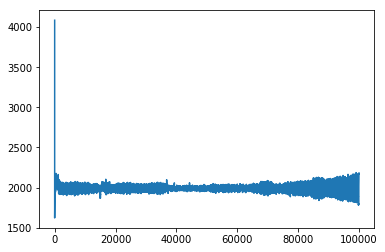

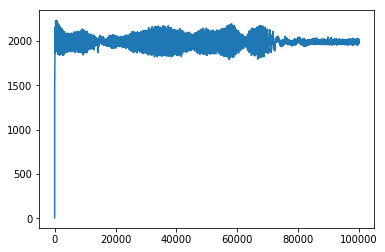

0.563354745131
0.621632822213
0.587637277248
1.04900538748


In [73]:
sample_period, data1 = raspi_import("./out/adcData_1.bin")
sample_period, data2 = raspi_import("./out/adcData_2.bin")
sample_period, data3 = raspi_import("./out/adcData_3.bin")
sample_period, data4 = raspi_import("./out/adcData_4.bin")

plt.plot(data1[:,3])
plt.show()
plt.plot(data2[:,3])
plt.show()
plt.plot(data3[:,3])
plt.show()
plt.plot(data4[:,3])
plt.show()
start = 4000
v1 = findVelocity(data1, 20000, 60000)
v2 = findVelocity(data2, 20000,60000)
v3 = findVelocity(data3, 40000,80000)
v4 = findVelocity(data4, 10000,60000)

print(v1)
print(v2)
print(v3)
print(v4)

![text](./Screenshots/sheets.jpg)
